<a href="https://colab.research.google.com/github/abraham-DBA/Heart-Disease-capstone-project/blob/main/Copy_of_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Define column names based on the dataset documentation
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'num'
]

# Load the dataset
df = pd.read_csv('processed.cleveland.data', header=None, names=column_names)

# Display the first few rows of the dataset
df.head()


Saving processed.cleveland.data to processed.cleveland (2).data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define categorical columns to encode
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode categorical variables
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define numerical columns to scale
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows to confirm the transformations
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,1,0,0.757525,-0.264900,1.0,2,0.017197,0,1.087338,2,0,1,0
1,1.392002,1,3,1.611220,0.760415,0.0,2,-1.821905,1,0.397182,1,3,0,2
2,1.392002,1,3,-0.665300,-0.342283,0.0,2,-0.902354,1,1.346147,1,2,2,1
3,-1.932564,1,2,-0.096170,0.063974,0.0,0,1.637359,0,2.122573,2,0,0,0
4,-1.489288,0,1,-0.096170,-0.825922,0.0,2,0.980537,0,0.310912,0,0,0,0


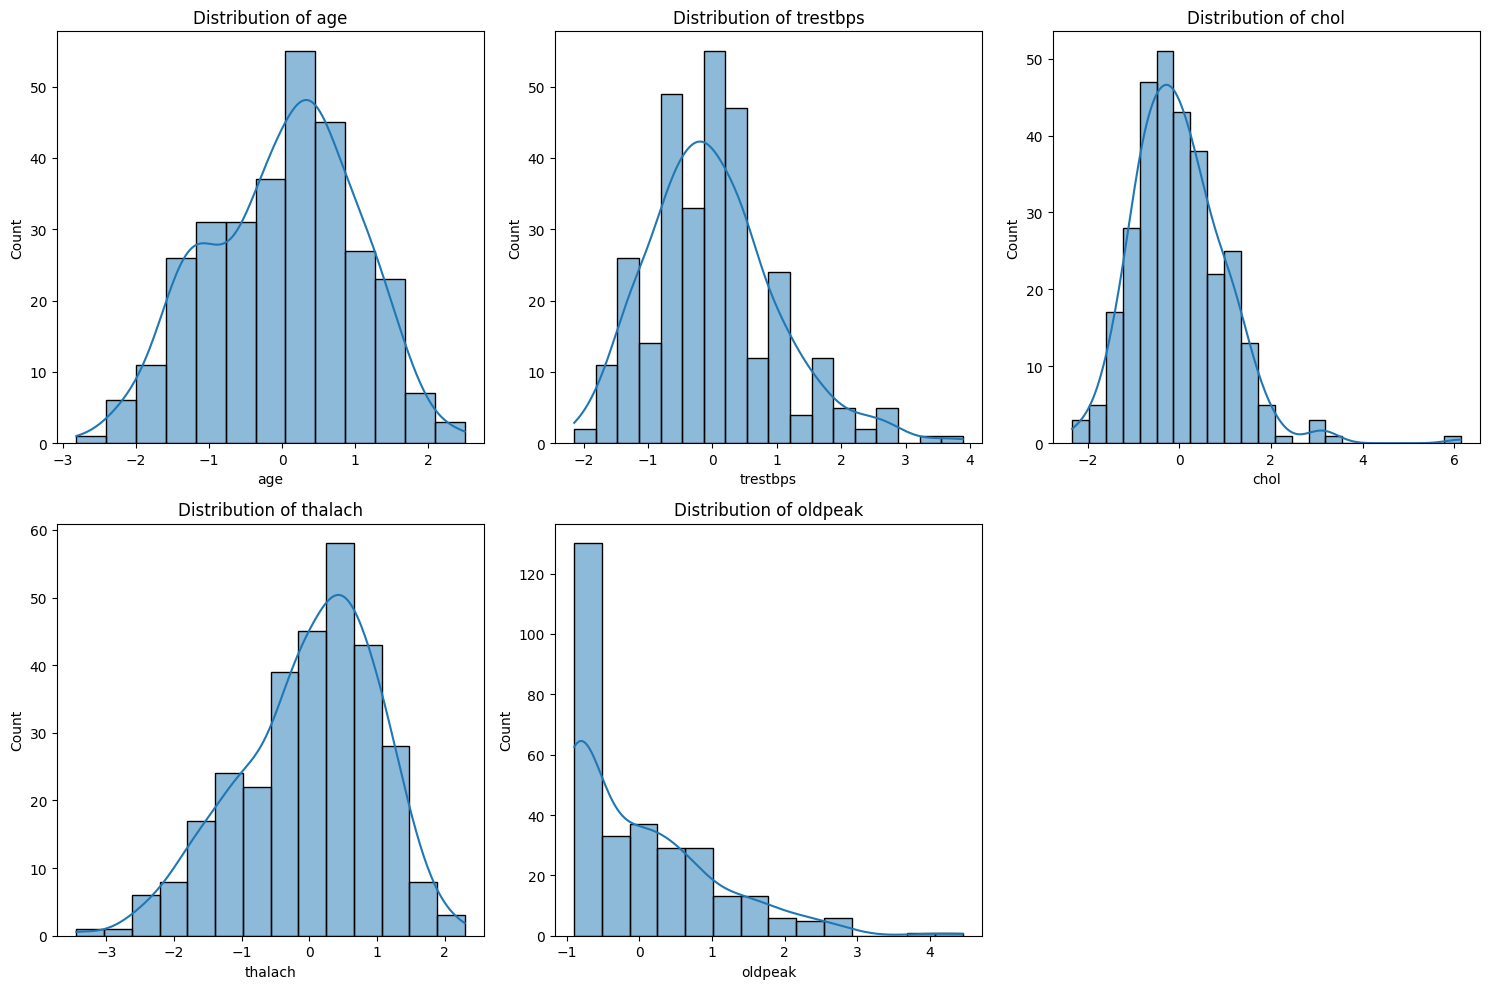

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


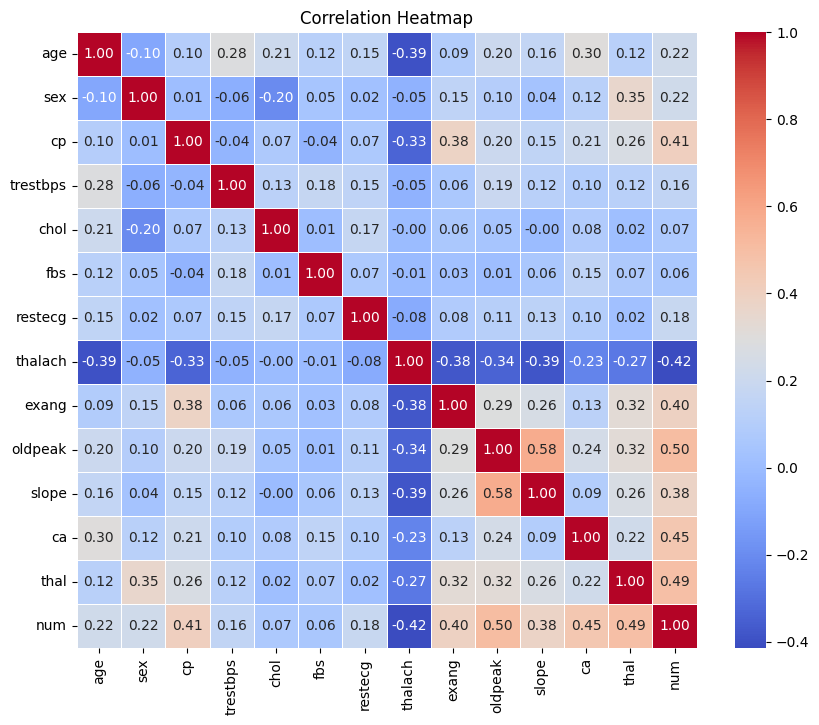

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


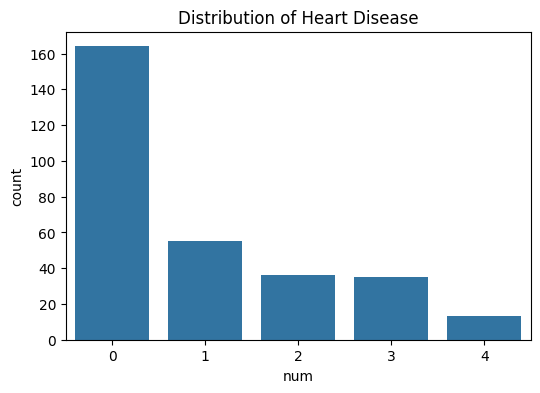

In [16]:
# Distribution of the target variable (num)
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df)
plt.title('Distribution of Heart Disease')
plt.show()


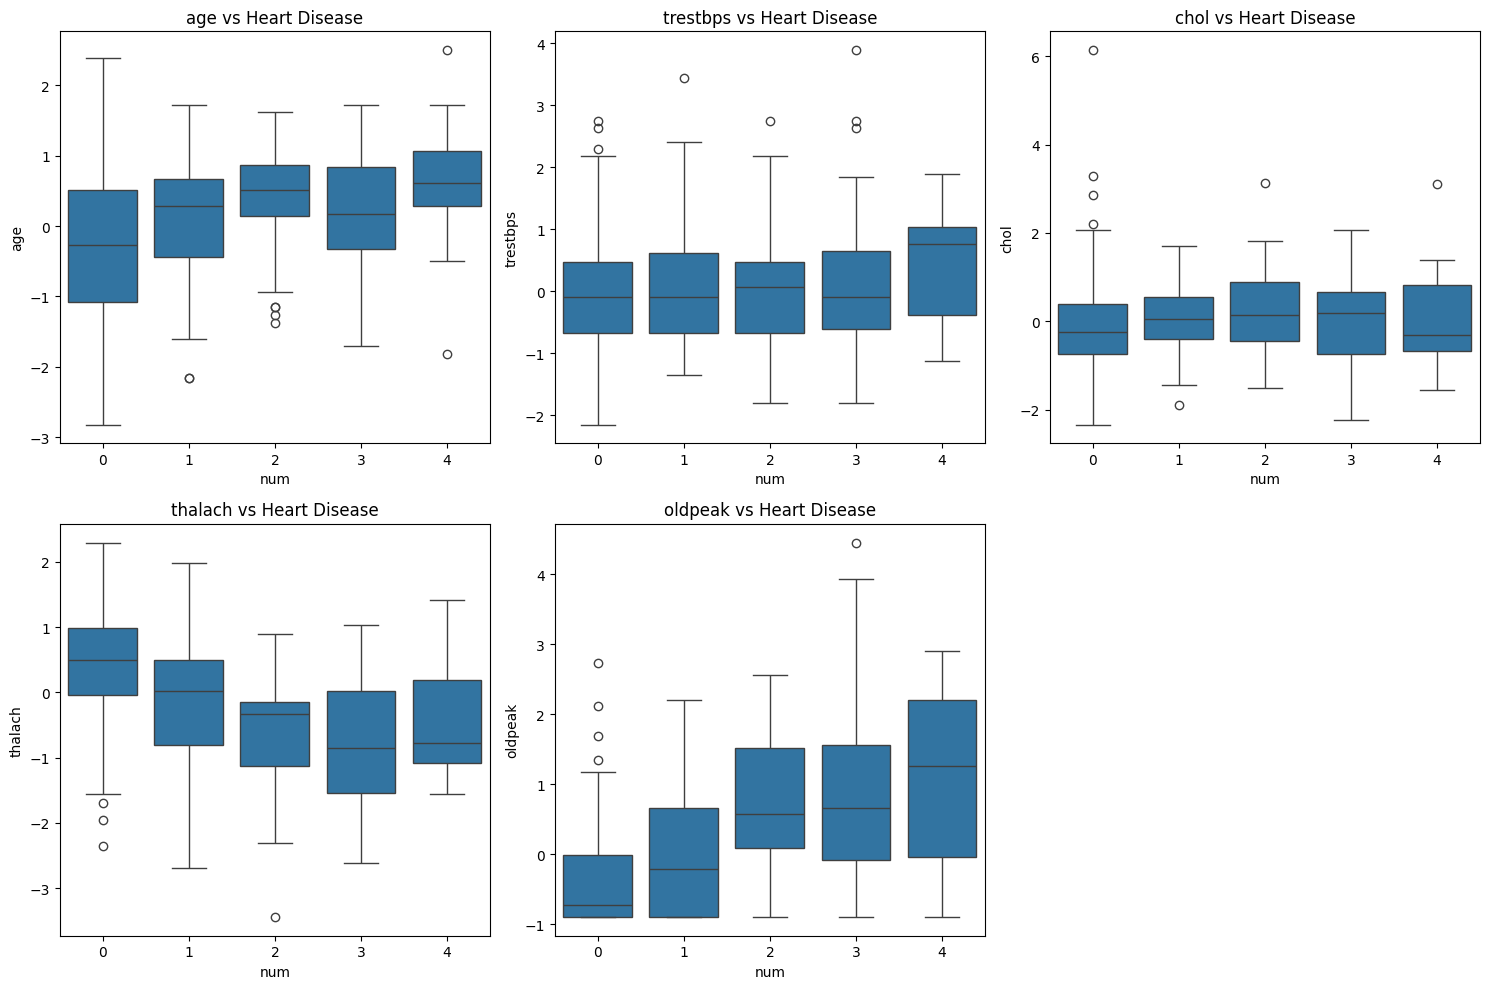

In [17]:
# Boxplots for numerical features by the target variable (num)
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='num', y=feature, data=df)
    plt.title(f'{feature} vs Heart Disease')
    plt.tight_layout()

plt.show()


In [26]:
# Convert target into binary: 0 = no disease, 1 = presence of disease
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


In [27]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('num', axis=1)  # Features (all columns except 'num')
y = df['num']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((242, 13), (61, 13), (242,), (61,))

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression - Accuracy: 0.8524590163934426
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest - Accuracy: 0.9016393442622951
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [30]:
# Confusion Matrix for Logistic Regression
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# Confusion Matrix for Random Forest
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Logistic Regression - Confusion Matrix:
[[25  4]
 [ 5 27]]
Random Forest - Confusion Matrix:
[[27  2]
 [ 4 28]]


In [31]:
# Convert target variable into binary classes
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


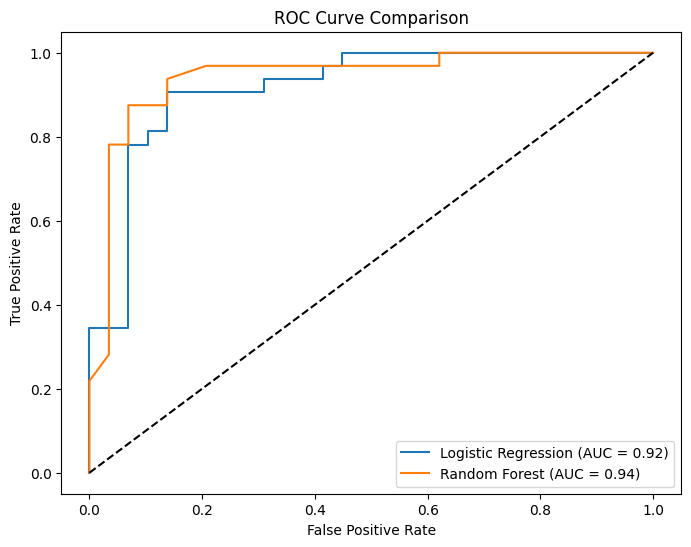

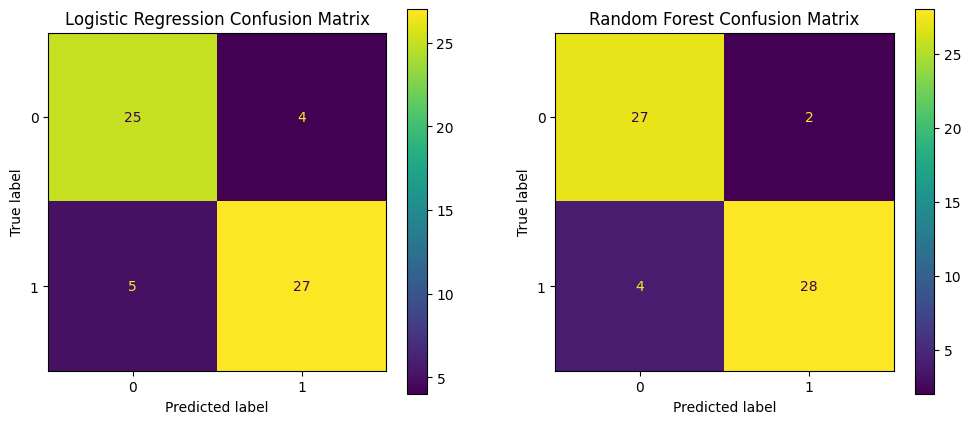

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay

# ROC and AUC for Logistic Regression
y_prob_logreg = logreg.predict_proba(X_test)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logreg)
auc_log = roc_auc_score(y_test, y_prob_logreg)

# ROC and AUC for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC Curves
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0,1],[0,1],'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Confusion Matrix Display
fig, axes = plt.subplots(1, 2, figsize=(12,5))
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
plt.show()


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
y_pred_log = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Probabilities (for AUC)
y_prob_log = logreg.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]

# Create comparison table
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

comparison


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.852459,0.870968,0.84375,0.857143,0.917026
1,Random Forest,0.901639,0.933333,0.87500,0.903226,0.941810


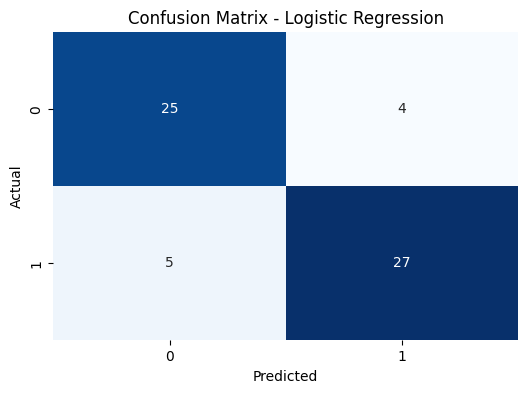

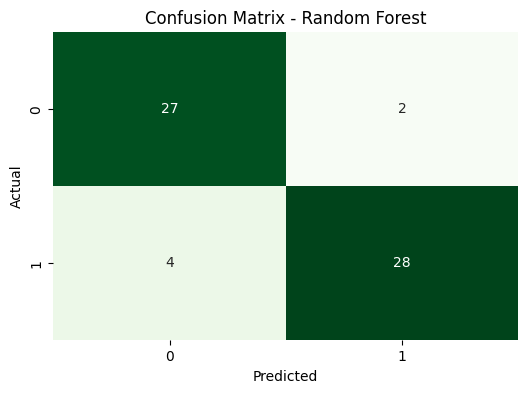

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
